In [1]:
import numpy as np
import pickle

In [3]:
orig_path = '/nas/Dataset/Phoenix/phoenix-2014-keypoints.pkl'
with open(orig_path, 'rb') as f:
    keypoints = pickle.load(f)

len(keypoints)

6841

In [3]:
sample = keypoints['fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute']['keypoints']

sample.shape # (T, N, 3)

(176, 133, 3)

In [16]:
keys = keypoints.keys()
values = keypoints.values()
items = keypoints.items()

In [22]:
keys_list = list(keys)
values_list = list(values)
items_list = list(items)

In [ ]:
coordinates = values_list[0]['keypoints']

In [41]:
coordinates = []
for i in range(len(keypoints)):
    coordinates.append(values_list[i]['keypoints'])
len(coordinates)

6841

In [62]:
# sample_xy = sample[..., :2]
# print(sample_xy.shape)
for i in range(len(coordinates)):
    coordinates[i] = coordinates[i][..., :2]

type(coordinates[50])

numpy.ndarray

In [ ]:
delta_coordinates = []
for i in range(len(coordinates)):
    delta_coordinates.append(np.diff(coordinates[i], axis=0))

In [66]:
coordinates[0][:2][:2], delta_coordinates[0][0][0]

(array([[[109.4 ,  48.53],
         [118.  ,  41.22],
         [ 99.06,  43.  ],
         [129.9 ,  49.2 ],
         [ 88.06,  53.62],
         [155.  , 115.1 ],
         [ 66.94, 118.4 ],
         [179.4 , 198.9 ],
         [ 42.72, 206.9 ],
         [159.  , 218.1 ],
         [ 80.25, 225.5 ],
         [145.5 , 245.5 ],
         [ 83.7 , 246.6 ],
         [105.56,  70.8 ],
         [ 92.5 ,  56.62],
         [129.2 , 233.2 ],
         [ 88.  ,  41.47],
         [128.5 , 231.6 ],
         [128.8 , 231.9 ],
         [118.44, 252.1 ],
         [101.06, 238.8 ],
         [101.2 , 238.8 ],
         [118.6 , 253.  ],
         [ 88.44,  47.84],
         [ 89.06,  53.56],
         [ 89.6 ,  58.78],
         [ 90.8 ,  64.  ],
         [ 92.9 ,  69.1 ],
         [ 96.06,  73.7 ],
         [100.4 ,  77.25],
         [105.7 ,  79.2 ],
         [111.4 ,  79.44],
         [116.94,  78.2 ],
         [121.8 ,  75.3 ],
         [125.44,  70.9 ],
         [127.94,  65.75],
         [129.1 ,  60.25],
 

In [24]:
# keys_list[:3]
values_list[:3]
# items_list[:3]

[{'keypoints': array([[[109.4   ,  48.53  ,   0.9727],
          [118.    ,  41.22  ,   0.9795],
          [ 99.06  ,  43.    ,   0.985 ],
          ...,
          [101.44  , 243.4   ,   0.828 ],
          [106.6   , 245.8   ,   0.8804],
          [110.1   , 246.6   ,   0.8843]],
  
         [[108.6   ,  47.16  ,   0.966 ],
          [117.9   ,  40.2   ,   0.9604],
          [ 98.7   ,  41.8   ,   0.9736],
          ...,
          [103.    , 239.6   ,   0.842 ],
          [106.8   , 241.5   ,   0.8643],
          [109.25  , 242.2   ,   0.848 ]],
  
         [[108.    ,  46.28  ,   0.9556],
          [117.56  ,  39.7   ,   0.9785],
          [ 98.06  ,  40.66  ,   0.9683],
          ...,
          [ 99.    , 227.6   ,   0.7515],
          [102.1   , 230.5   ,   0.813 ],
          [104.06  , 231.9   ,   0.8125]],
  
         ...,
  
         [[101.75  ,  65.1   ,   0.935 ],
          [110.2   ,  51.34  ,   0.971 ],
          [ 89.9   ,  53.56  ,   0.959 ],
          ...,
          [ 11.1

In [28]:
values_list[0]['keypoints'].shape

(176, 133, 3)

In [ ]:
import lovely_tensors as lt

# Reshape each array into (-1, 2) and concatenate along the 0 axis.
all_deltas = np.concatenate([d.reshape(-1, 2) for d in delta_coordinates], axis=0)
delta_x = all_deltas[:, 0]
delta_y = all_deltas[:, 1]

# # Visualize the statistics for delta x.
# print("Delta X statistics:")
# lt.explain(delta_x, name="Delta X Statistics", plot=True)

# # Visualize the statistics for delta y.
# print("Delta Y statistics:")
# lt.explain(delta_y, name="Delta Y Statistics", plot=True)



(127257459,)

In [74]:
delta_x.shape, delta_y.shape

((127257459,), (127257459,))

In [81]:
import torch
import lovely_tensors as lt
lt.monkey_patch()

In [85]:
torch.from_numpy(delta_x).v

/home/nirmal/miniconda3/envs/slr/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/nirmal/miniconda3/envs/slr/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


tensor[127257459] f16 0.2Gb x∈[-6.438e+04, 6.435e+04] μ=-0.000 σ=inf +Inf! -Inf!
tensor([ -0.7500,  -0.1250,  -0.3750,  ..., -61.3438, -60.9688, -61.0938],
       dtype=torch.float16)

In [84]:
torch.from_numpy(delta_y).v

/home/nirmal/miniconda3/envs/slr/lib/python3.10/site-packages/numpy/core/_methods.py:152: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


tensor[127257459] f16 0.2Gb x∈[-6.374e+04, 6.371e+04] μ=0.018 σ=inf +Inf! -Inf!
tensor([-1.3750, -1.0312, -1.1875,  ..., 38.7500, 40.5000, 42.0000],
       dtype=torch.float16)

In [88]:
index = 0
for video_key, value in zip(keys_list, values_list):
    keypoints = value['keypoints']  # shape (T, N, 3)
    T = keypoints.shape[0]
    for t in range(T):
        frame = keypoints[t]
        if np.isnan(frame).any():
            print(f"In video index {index}, frame {t} has a NaN value.")
        if np.isinf(frame).any():
            print(f"In video index {index}, frame {t} has an Inf value.")
    index += 1

In video index 187, frame 69 has an Inf value.
In video index 1243, frame 68 has an Inf value.
In video index 1325, frame 196 has an Inf value.
In video index 1612, frame 121 has an Inf value.
In video index 1939, frame 85 has an Inf value.
In video index 2149, frame 86 has an Inf value.
In video index 2694, frame 40 has an Inf value.
In video index 4751, frame 23 has an Inf value.
In video index 4751, frame 26 has an Inf value.
In video index 5176, frame 70 has an Inf value.


In [96]:
coordinates[187][69]

array([[ 95.4 ,  66.75],
       [104.4 ,  57.1 ],
       [ 86.3 ,  53.97],
       [112.9 ,  62.84],
       [ 72.3 ,  57.28],
       [128.9 , 113.25],
       [ 54.34, 121.2 ],
       [149.8 , 192.4 ],
       [ 31.8 , 206.9 ],
       [150.9 , 249.2 ],
       [ 59.25, 139.6 ],
       [124.8 , 243.4 ],
       [ 67.6 , 244.9 ],
       [ 85.7 ,  87.94],
       [104.5 ,  91.8 ],
       [114.06,  52.94],
       [   inf,    inf],
       [115.44,  66.06],
       [115.56,  65.94],
       [ 91.8 ,  41.7 ],
       [ 71.44,  60.3 ],
       [ 71.44,  60.12],
       [ 73.94, 123.  ],
       [ 73.94,  52.75],
       [ 73.5 ,  58.5 ],
       [ 73.56,  64.94],
       [ 74.1 ,  71.06],
       [ 75.4 ,  77.5 ],
       [ 77.1 ,  83.9 ],
       [ 80.1 ,  89.5 ],
       [ 84.56,  94.06],
       [ 90.2 ,  96.4 ],
       [ 96.44,  96.  ],
       [101.7 ,  92.94],
       [105.5 ,  87.9 ],
       [108.25,  82.25],
       [110.3 ,  76.25],
       [111.7 ,  70.2 ],
       [112.2 ,  63.84],
       [112.75,  57.84],


In [23]:
# Set grid size (e.g. s=5)
s = 1

# (x, y) coordinates리
keypoints = sample[..., :2]  # (176, 133, 2)

# Align the first frame to the Grid (rounded)
first_frame = np.round(keypoints[0] / s) * s  # (133, 2)

# Calculating change (dx, dy)
dx = np.diff(keypoints[..., 0], axis=0)  # x change (175, 133)
dy = np.diff(keypoints[..., 1], axis=0)  # y change (175, 133)

# Definition of possible movement vectors (9)
movement_vectors = np.array([
    (s, 0), (s, -s), (0, -s), (-s, -s), (-s, 0),
    (-s, s), (0, s), (s, s), (0, 0)
])

# Converts the change amount to the nearest of 9 values
quantized_dx = np.zeros_like(dx)
quantized_dy = np.zeros_like(dy)

for i in range(175):
    for j in range(133):
        diff = np.array([dx[i, j], dy[i, j]])  # Current change amount
        distances = np.linalg.norm(movement_vectors - diff, axis=1)  # 9 candidates and distance calculation
        best_match = movement_vectors[np.argmin(distances)]  # Select the closest movement
        quantized_dx[i, j], quantized_dy[i, j] = best_match  # save

# Save converted data
transformed_data = np.zeros((176, 133, 2), dtype=np.float32)
transformed_data[0] = first_frame  # First frame (absolute coordinates)
transformed_data[1:] = np.stack([quantized_dx, quantized_dy], axis=-1)  # subsequent frames (dx, dy)

# Check the converted data
print("Grid size:", s)
print("Transformed shape:", transformed_data.shape)  # (176, 133, 2)
print("First frame (grid-aligned):", transformed_data[0, :5])  # First frame coordinates
print("Second frame (quantized movements):", transformed_data[1, :5])  # dx, dy values ​​(one of 9)


Grid size: 1
Transformed shape: (176, 133, 2)
First frame (grid-aligned): [[109.  49.]
 [118.  41.]
 [ 99.  43.]
 [130.  49.]
 [ 88.  54.]]
Second frame (quantized movements): [[-1. -1.]
 [ 0. -1.]
 [ 0. -1.]
 [ 0.  1.]
 [ 0.  0.]]


In [15]:
transformed_data

array([[[109.,  49.],
        [118.,  41.],
        [ 99.,  43.],
        ...,
        [101., 243.],
        [107., 246.],
        [110., 247.]],

       [[ -1.,  -1.],
        [  0.,  -1.],
        [  0.,  -1.],
        ...,
        [  1.,  -1.],
        [  0.,  -1.],
        [ -1.,  -1.]],

       [[ -1.,  -1.],
        [  0.,  -1.],
        [ -1.,  -1.],
        ...,
        [ -1.,  -1.],
        [ -1.,  -1.],
        [ -1.,  -1.]],

       ...,

       [[  0.,   0.],
        [  0.,   0.],
        [  0.,   0.],
        ...,
        [  1.,   1.],
        [  1.,   1.],
        [  1.,   1.]],

       [[  0.,   0.],
        [  0.,   0.],
        [  0.,   0.],
        ...,
        [  1.,   1.],
        [  1.,   1.],
        [  1.,   1.]],

       [[  0.,   0.],
        [ -1.,   0.],
        [  0.,   0.],
        ...,
        [  1.,   0.],
        [  1.,   0.],
        [  1.,   0.]]], dtype=float32)

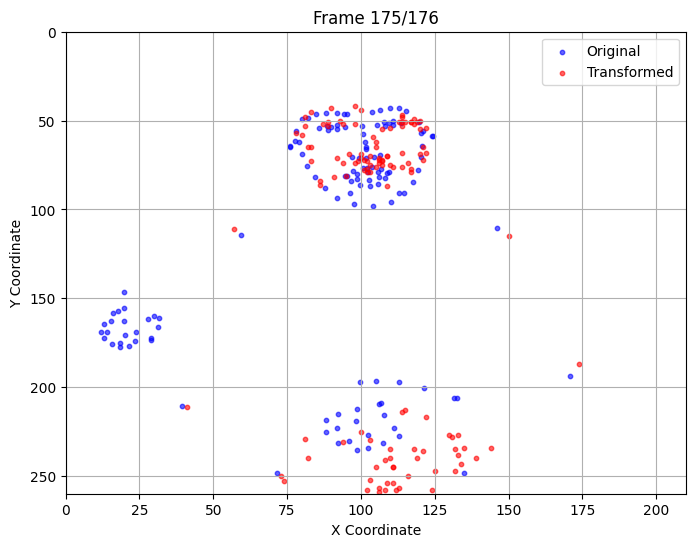

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Original data
original_x = sample[..., 0]  # (176, 133)
original_y = sample[..., 1]  # (176, 133)

# Reconstruct transformed data (first frame + cumulative sum of changes)
reconstructed_x = np.cumsum(transformed_data[..., 0], axis=0)  # Calculate cumulative sum
reconstructed_y = np.cumsum(transformed_data[..., 1], axis=0)

# Set up the animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 210)
ax.set_ylim(260, 0)  # Flip the y-axis because in OpenPose coordinate system (0,0) is top-left
ax.set_title("Keypoint Comparison Over Time")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")

# Create two scatter plots to visualize original and transformed data
original_scatter = ax.scatter([], [], color='blue', label='Original', alpha=0.6, s=10)
transformed_scatter = ax.scatter([], [], color='red', label='Transformed', alpha=0.6, s=10)

ax.legend()
ax.grid(True)

# Define update function for animation
def update(frame):
    original_scatter.set_offsets(np.column_stack((original_x[frame], original_y[frame])))
    transformed_scatter.set_offsets(np.column_stack((reconstructed_x[frame], reconstructed_y[frame])))
    ax.set_title(f"Frame {frame}/{original_x.shape[0]}")
    return original_scatter, transformed_scatter

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=original_x.shape[0], interval=50, blit=True)
ani.save(f"keypoint_comparison_{s}.gif", writer="pillow", fps=20)

In [11]:
prob = sample[..., 2]
prob.shape

(176, 133)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# # Original data
# original_x = sample[..., 0]  # (176, 133)
# original_y = sample[..., 1]  # (176, 133)

# # Calculate differences (dx, dy) using the original differences without a grid
# dx = np.diff(original_x, axis=0)  # (175, 133)
# dy = np.diff(original_y, axis=0)  # (175, 133)

# # Reconstruct data based on differences (keeping the first frame unchanged)
# transformed_data = np.zeros((sample.shape[0], sample.shape[1], 2))  # (176, 133, 2)
# transformed_data[0] = sample[0, :, :2]  # Keep the first frame as is (x, y coordinates only)

# # Fill in the rest of the frames using the differences
# transformed_data[1:] = np.stack([dx, dy], axis=-1)  # Store differences (dx, dy) of shape (175, 133, 2)

# # Reconstruct transformed data using cumulative sum
# reconstructed_x = np.cumsum(transformed_data[..., 0], axis=0)
# reconstructed_y = np.cumsum(transformed_data[..., 1], axis=0)

# # Set up the animation
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.set_xlim(0, 210)
# ax.set_ylim(260, 0)  # Flip the y-axis because in the OpenPose coordinate system, (0,0) is top-left
# ax.set_title("Keypoint Comparison Over Time")
# ax.set_xlabel("X Coordinate")
# ax.set_ylabel("Y Coordinate")

# # Create two scatter plots to visualize the original and transformed data
# # original_scatter = ax.scatter([], [], color='blue', label='Original', alpha=0.6, s=10)
# transformed_scatter = ax.scatter([], [], color='red', label='Transformed', alpha=0.6, s=10)

# ax.legend()
# ax.grid(True)

# # Define the update function for the animation
# def update(frame):
#     original_scatter.set_offsets(np.column_stack((original_x[frame], original_y[frame])))
#     transformed_scatter.set_offsets(np.column_stack((reconstructed_x[frame], reconstructed_y[frame])))
#     ax.set_title(f"Frame {frame}/{original_x.shape[0]}")
#     return original_scatter, transformed_scatter

# # Create the animation
# ani = animation.FuncAnimation(fig, update, frames=original_x.shape[0], interval=50, blit=False)

# # Save the animation
# ani.save("keypoint_comparison_no_grid.gif", writer="pillow", fps=20)

/tmp/ipykernel_236784/4217125524.py:13: RuntimeWarning: overflow encountered in divide
  first_frame = np.round(sample[0, :, :2] / s) * s  # (133, 2)


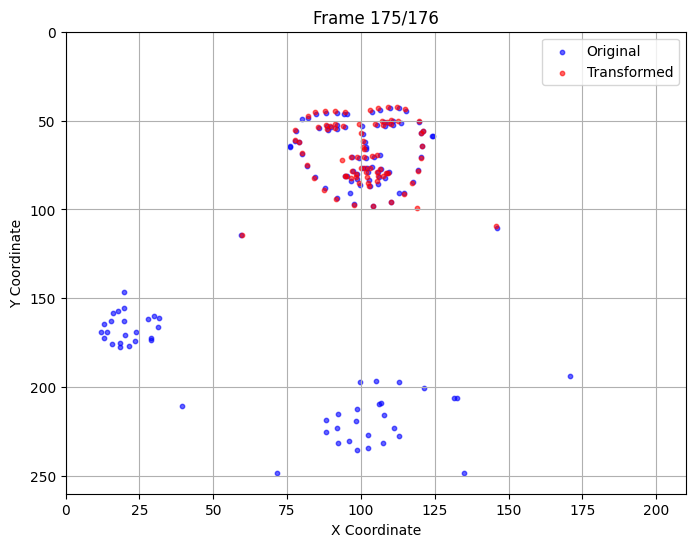

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Original data
original_x = sample[..., 0]  # (176, 133)
original_y = sample[..., 1]  # (176, 133)

# Set grid size (e.g., s=5)
s = 1/400

# 🔹 Align the first frame to the grid
first_frame = np.round(sample[0, :, :2] / s) * s  # (133, 2)

# 🔹 Calculate differences (dx, dy)
dx = np.diff(original_x, axis=0)  # (175, 133)
dy = np.diff(original_y, axis=0)  # (175, 133)

# 🔹 Define possible movement vectors (9 directions)
movement_vectors = np.array([
    (s, 0), (s, -s), (0, -s), (-s, -s), (-s, 0),
    (-s, s), (0, s), (s, s), (0, 0)
])

# 🔹 Convert the differences into one of the 9 vectors (split large movements into smaller ones)
quantized_dx = np.zeros_like(dx)
quantized_dy = np.zeros_like(dy)

for i in range(175):
    for j in range(133):
        remaining_dx = dx[i, j]
        remaining_dy = dy[i, j]
        
        # 🔹 Split large movements into several small vectors
        while abs(remaining_dx) > s or abs(remaining_dy) > s:
            diff = np.array([remaining_dx, remaining_dy])
            distances = np.linalg.norm(movement_vectors - diff, axis=1)
            best_match = movement_vectors[np.argmin(distances)]
            
            # Update the stored differences based on the vector
            quantized_dx[i, j] += best_match[0]
            quantized_dy[i, j] += best_match[1]
            
            # Update the remaining movement
            remaining_dx -= best_match[0]
            remaining_dy -= best_match[1]
        
        # Convert the last remaining movement to the closest vector
        diff = np.array([remaining_dx, remaining_dy])
        distances = np.linalg.norm(movement_vectors - diff, axis=1)
        best_match = movement_vectors[np.argmin(distances)]
        quantized_dx[i, j] += best_match[0]
        quantized_dy[i, j] += best_match[1]

# 🔹 Save the transformed data using only the 9 vectors
transformed_data = np.zeros((176, 133, 2), dtype=np.float32)
transformed_data[0] = first_frame  # First frame (absolute coordinates)
transformed_data[1:] = np.stack([quantized_dx, quantized_dy], axis=-1)  # Subsequent frames (dx, dy)

# 🔹 Reconstruct the transformed data (using only the 9 vectors for reconstruction)
for t in range(1, 176):
    transformed_data[t, :, 0] = transformed_data[t - 1, :, 0] + quantized_dx[t - 1]
    transformed_data[t, :, 1] = transformed_data[t - 1, :, 1] + quantized_dy[t - 1]

reconstructed_x = transformed_data[..., 0]
reconstructed_y = transformed_data[..., 1]

# 🔹 Set up the animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 210)
ax.set_ylim(260, 0)  # Flip the y-axis because in the OpenPose coordinate system, (0,0) is top-left
ax.set_title("Keypoint Comparison Over Time (9-Vector with Split Large Motion)")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")

# Create two scatter plots to visualize the original and transformed data
original_scatter = ax.scatter([], [], color='blue', label='Original', alpha=0.6, s=10)
transformed_scatter = ax.scatter([], [], color='red', label='Transformed', alpha=0.6, s=10)

ax.legend()
ax.grid(True)

# 🔹 Define the update function for the animation
def update(frame):
    original_scatter.set_offsets(np.column_stack((original_x[frame], original_y[frame])))
    transformed_scatter.set_offsets(np.column_stack((reconstructed_x[frame], reconstructed_y[frame])))
    ax.set_title(f"Frame {frame}/{original_x.shape[0]}")
    return original_scatter, transformed_scatter

# 🔹 Create the animation
ani = animation.FuncAnimation(fig, update, frames=original_x.shape[0], interval=50, blit=False)

# 🔹 Save the animation
ani.save("keypoint_comparison_9vectors_split.gif", writer="pillow", fps=20)
plt.show()

In [18]:
first_frame

array([[109.4 ,  48.53],
       [118.  ,  41.22],
       [ 99.06,  43.  ],
       [129.9 ,  49.16],
       [ 88.1 ,  53.62],
       [155.  , 115.1 ],
       [ 66.94, 118.4 ],
       [   inf,    inf],
       [ 42.72,    inf],
       [159.  ,    inf],
       [ 80.25,    inf],
       [145.5 ,    inf],
       [ 83.7 ,    inf],
       [105.56,  70.8 ],
       [ 92.5 ,  56.62],
       [129.2 ,    inf],
       [ 88.  ,  41.44],
       [128.5 ,    inf],
       [128.8 ,    inf],
       [118.44,    inf],
       [101.06,    inf],
       [101.25,    inf],
       [118.56,    inf],
       [ 88.44,  47.84],
       [ 89.06,  53.56],
       [ 89.6 ,  58.78],
       [ 90.8 ,  64.  ],
       [ 92.9 ,  69.1 ],
       [ 96.1 ,  73.7 ],
       [100.3 ,  77.25],
       [105.7 ,  79.2 ],
       [111.4 ,  79.44],
       [116.9 ,  78.2 ],
       [121.8 ,  75.3 ],
       [125.44,  70.9 ],
       [127.94,  65.75],
       [129.1 ,  60.25],
       [129.4 ,  54.72],
       [129.  ,  49.38],
       [128.6 ,  43.78],


In [39]:
quantized_dx[0]

array([-0.7354, -0.125 , -0.3691, -0.3691, -0.2471, -0.7354,  0.2471,
       -0.3691, -0.3984,  0.2471, -2.83  , -1.122 ,  0.7354,  8.    ,
        0.7354, -3.22  ,  2.098 , -8.    , -8.    ,  8.    ,  2.39  ,
        2.342 , -1.342 , -0.186 , -0.3691, -0.4912, -0.6133, -0.7354,
       -0.6133, -0.6133, -0.6133, -0.6743, -0.7354, -0.6743, -0.5522,
       -0.4912, -0.3691, -0.3691, -0.2471, -0.2471, -0.308 , -0.308 ,
       -0.308 , -0.308 , -0.308 , -0.186 , -0.0625,  0.0625,  0.125 ,
        0.125 , -0.4302, -0.4912, -0.6743, -0.7964, -0.6743, -0.7354,
       -0.7354, -0.7964, -0.7964, -0.3691, -0.3691, -0.3691, -0.3691,
       -0.3691, -0.4302, -0.308 , -0.186 , -0.0625,  0.    , -0.125 ,
       -0.186 , -0.7354, -0.7354, -0.7354, -0.7964, -0.8574, -0.9185,
       -0.9185, -1.195 , -1.195 , -1.122 , -0.9185, -0.7354, -0.7354,
       -0.7354, -0.8574, -0.9185, -0.9795, -1.049 , -1.049 , -0.7964,
        0.2471,  0.7354,  1.122 ,  2.195 ,  2.684 , -0.6133, -0.7354,
        0.7354,  2.0

In [40]:
transformed_data[0][15], transformed_data[1][15]

(array([129.25,    inf], dtype=float32),
 array([126.0293,      inf], dtype=float32))

In [41]:
quantized_dy[0]

array([-1.415 , -1.014 , -1.195 ,  0.645 ,  0.    , -0.4302,  0.186 ,
       -0.4912, -0.6133, -2.781 , -2.977 , -2.    , -1.8545, -8.    ,
       -0.8574, -8.    , -1.781 , -8.    , -8.    , -8.    , -8.    ,
       -8.    , -8.    ,  0.0625, -0.125 , -0.2764, -0.3984, -0.5522,
       -0.7964, -0.9795, -1.269 , -1.269 , -1.195 , -0.8574, -0.4302,
       -0.0625,  0.125 ,  0.3691,  0.4595,  0.3374, -0.6743, -0.645 ,
       -0.7354, -0.828 , -0.9185, -0.9795, -0.95  , -0.904 , -0.767 ,
       -0.584 , -1.269 , -1.38  , -1.453 , -1.38  , -1.415 , -1.38  ,
       -1.269 , -1.195 , -1.122 , -1.122 , -1.122 , -1.195 , -1.269 ,
       -1.269 , -1.233 , -1.195 , -1.087 , -0.95  , -0.828 , -0.9795,
       -1.122 , -1.6   , -1.453 , -1.233 , -1.195 , -1.16  , -1.16  ,
       -1.233 , -1.819 , -2.293 , -2.537 , -2.39  , -2.074 , -1.635 ,
       -1.562 , -1.415 , -1.342 , -1.307 , -1.819 , -2.146 , -2.049 ,
       -2.781 , -3.074 , -3.953 , -3.855 , -3.953 , -7.227 , -8.    ,
       -8.    , -8. 

In [42]:
import pickle

with open('/nas/Dataset/Phoenix/phoenix-2014-doppler-vectorized.pkl', 'rb') as f:
    dd = pickle.load(f)

dd

{'fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute': {'keypoints': array([[[-1,  0,  0],
          [-1,  0,  0],
          [-1,  0,  0],
          ...,
          [-1,  0,  0],
          [-1,  0,  0],
          [-1,  0,  0]],
  
         [[-1,  0,  0],
          [-1,  0,  0],
          [-1,  0,  0],
          ...,
          [ 0,  0,  0],
          [-1,  0,  0],
          [-1,  0,  0]],
  
         [[-1,  0,  0],
          [-1,  0,  0],
          [-1,  0,  0],
          ...,
          [-1, -1,  0],
          [-1,  0,  0],
          [-1,  0,  0]],
  
         ...,
  
         [[-1,  1,  0],
          [-1,  1,  0],
          [-1,  0,  0],
          ...,
          [ 0,  1,  0],
          [ 0,  1,  0],
          [ 0,  1,  0]],
  
         [[-1,  0,  0],
          [-1,  1,  0],
          [-1,  0,  0],
          ...,
          [ 0,  1,  0],
          [ 0,  1,  0],
          [ 0,  1,  0]],
  
         [[-1,  0,  0],
          [-1,  0,  0],
          

In [43]:
sample = dd['fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute']['keypoints']

sample

array([[[-1,  0,  0],
        [-1,  0,  0],
        [-1,  0,  0],
        ...,
        [-1,  0,  0],
        [-1,  0,  0],
        [-1,  0,  0]],

       [[-1,  0,  0],
        [-1,  0,  0],
        [-1,  0,  0],
        ...,
        [ 0,  0,  0],
        [-1,  0,  0],
        [-1,  0,  0]],

       [[-1,  0,  0],
        [-1,  0,  0],
        [-1,  0,  0],
        ...,
        [-1, -1,  0],
        [-1,  0,  0],
        [-1,  0,  0]],

       ...,

       [[-1,  1,  0],
        [-1,  1,  0],
        [-1,  0,  0],
        ...,
        [ 0,  1,  0],
        [ 0,  1,  0],
        [ 0,  1,  0]],

       [[-1,  0,  0],
        [-1,  1,  0],
        [-1,  0,  0],
        ...,
        [ 0,  1,  0],
        [ 0,  1,  0],
        [ 0,  1,  0]],

       [[-1,  0,  0],
        [-1,  0,  0],
        [-1,  0,  0],
        ...,
        [ 0,  1,  0],
        [ 0,  1,  0],
        [ 0,  0,  0]]], dtype=int8)

In [44]:
sample.shape

(176, 133, 3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# The sample data assumes a shape of (176, 133, 3).
# In each frame of the sample, [:, :, :2] represent the change in x, y.
# Set the initial position to (100, 100) and use the cumulative sum to obtain the actual coordinates.
initial_offset = np.array([100, 100])
positions = np.cumsum(sample[:, :, :2], axis=0) + initial_offset
# positions의 shape: (176, 133, 2)

# Setting up figures and axes for animation
fig, ax = plt.subplots()
scat = ax.scatter(positions[0, :, 0], positions[0, :, 1], c='blue')

# Set the coordinate range to fit the data (add 10 extra spaces)
ax.set_xlim(np.min(positions[:, :, 0]) - 10, np.max(positions[:, :, 0]) + 10)
ax.set_ylim(np.min(positions[:, :, 1]) - 10, np.max(positions[:, :, 1]) + 10)
ax.set_title('Keypoints Animation')

# A function that updates the position of the scatter plot for each frame.
def update(frame):
    scat.set_offsets(positions[frame])
    ax.set_title(f'Frame {frame}')
    return scat,

# Creating animations using FuncAnimation
ani = animation.FuncAnimation(
    fig, update, frames=positions.shape[0], interval=100, blit=True
)

# Save animation as GIF file (using Pillow writer, fps is 10)
ani.save('animation.gif', writer='pillow', fps=10)

# After saving the GIF file, close the figure.
plt.close()

In [19]:
original_x.shape

(176, 133)

In [20]:
reconstructed_x.shape

(176, 133)

In [21]:
elements = [x for x in original_x for x in x]
sum(elements) / len(elements)

103.75343549080442

In [22]:
re_el = [x for x in reconstructed_x for x in x]
sum(re_el) / len(re_el)

inf

## Experimenting with the Keypoints data for delta values

In [97]:
import pickle
import numpy as np

# ---------------------------
# 1. Load the keypoints data
# ---------------------------
orig_path = '/nas/Dataset/Phoenix/phoenix-2014-keypoints.pkl'
with open(orig_path, 'rb') as f:
    keypoints = pickle.load(f)

# Optionally, extract keys and values for ease of processing
keys_list = list(keypoints.keys())
values_list = list(keypoints.values())

In [98]:
# -----------------------------------------------------------
# 2. Extract x and y coordinates (omit confidence) for all videos,
#    and compute global min and max for x and y separately.
# -----------------------------------------------------------
all_x_list = []
all_y_list = []

for video in values_list:
    # 'keypoints' has shape (T, N, 3); we keep only x and y.
    coords = video['keypoints'][..., :2]  # shape: (T, N, 2)
    all_x_list.append(coords[..., 0].flatten())
    all_y_list.append(coords[..., 1].flatten())

# Concatenate all x's and y's
all_x = np.concatenate(all_x_list, axis=0)
all_y = np.concatenate(all_y_list, axis=0)

# Filter out only finite values
finite_x = all_x[np.isfinite(all_x)]
finite_y = all_y[np.isfinite(all_y)]

# Compute global minimum and maximum for x and y separately.
global_min_x = finite_x.min() if finite_x.size > 0 else -1.0
global_max_x = finite_x.max() if finite_x.size > 0 else 1.0
global_min_y = finite_y.min() if finite_y.size > 0 else -1.0
global_max_y = finite_y.max() if finite_y.size > 0 else 1.0

print("Global finite minimum for x:", global_min_x)
print("Global finite maximum for x:", global_max_x)
print("Global finite minimum for y:", global_min_y)
print("Global finite maximum for y:", global_max_y)

Global finite minimum for x: -59940.0
Global finite maximum for x: 64450.0
Global finite minimum for y: -63580.0
Global finite maximum for y: 61280.0


In [99]:
# -----------------------------------------------------------
# 3. Process each video's keypoints:
#    - Replace infinities in x and y with the computed global bounds.
#    - Compute delta_coordinates (differences between successive frames).
#    Store all delta arrays in a list.
# -----------------------------------------------------------
delta_coordinates = []  # list to hold delta arrays (one per video)

for video_key in keys_list:
    video = keypoints[video_key]
    # Extract x,y coordinates and convert to a higher precision (float32) for safety.
    coords = video['keypoints'][..., :2].astype(np.float32)  # shape: (T, N, 2)

    # Replace infinities separately in x and y:
    # For x coordinate:
    coords[..., 0] = np.where(np.isposinf(coords[..., 0]), global_max_x, coords[..., 0])
    coords[..., 0] = np.where(np.isneginf(coords[..., 0]), global_min_x, coords[..., 0])
    # For y coordinate:
    coords[..., 1] = np.where(np.isposinf(coords[..., 1]), global_max_y, coords[..., 1])
    coords[..., 1] = np.where(np.isneginf(coords[..., 1]), global_min_y, coords[..., 1])
    
    # Additionally, replace any NaNs with 0 (or another appropriate value).
    coords = np.nan_to_num(coords, nan=0.0)
    
    # Compute delta coordinates along the time axis (frame-to-frame differences).
    # Resulting shape will be (T-1, N, 2)
    delta = np.diff(coords, axis=0)
    delta_coordinates.append(delta)

print(f"Processed delta coordinates for {len(delta_coordinates)} videos.")

Processed delta coordinates for 6841 videos.


In [101]:
# -----------------------------------------------------------
# 4. Verification: Ensure there are no infinities or NaNs left,
#    and print separate statistics for the x and y components.
# -----------------------------------------------------------
# Concatenate all delta arrays into one for global statistics.
all_deltas = np.concatenate([d.reshape(-1, 2) for d in delta_coordinates], axis=0)

# Separate x and y components
delta_x = all_deltas[:, 0]
delta_y = all_deltas[:, 1]

# Check for infinities and NaNs in delta_x
if np.any(np.isinf(delta_x)):
    print("Warning: There are infinities in delta_x!")
else:
    print("No infinities in delta_x.")

if np.any(np.isnan(delta_x)):
    print("Warning: There are NaNs in delta_x!")
else:
    print("No NaNs in delta_x.")

# Check for infinities and NaNs in delta_y
if np.any(np.isinf(delta_y)):
    print("Warning: There are infinities in delta_y!")
else:
    print("No infinities in delta_y.")

if np.any(np.isnan(delta_y)):
    print("Warning: There are NaNs in delta_y!")
else:
    print("No NaNs in delta_y.")

# Print statistics for delta_x
print("\nDelta X statistics:")
print("Min:", delta_x.min())
print("Max:", delta_x.max())
print("Mean:", delta_x.mean())
print("Std:", delta_x.std())

# Print statistics for delta_y
print("\nDelta Y statistics:")
print("Min:", delta_y.min())
print("Max:", delta_y.max())
print("Mean:", delta_y.mean())
print("Std:", delta_y.std())


No infinities in delta_x.
No NaNs in delta_x.
No infinities in delta_y.
No NaNs in delta_y.

Delta X statistics:
Min: -64369.438
Max: 64341.5
Mean: -0.00010711608
Std: 34.730736

Delta Y statistics:
Min: -63752.5
Max: 63773.875
Mean: 0.01797593
Std: 37.2818


In [107]:
import matplotlib.pyplot as plt


Original Delta X statistics:
Min: -64369.438 Max: 64341.5 Mean: -0.00010711608 Std: 34.730736

Original Delta Y statistics:
Min: -63752.5 Max: 63773.875 Mean: 0.01797593 Std: 37.2818

Scaled Delta X statistics:
Min: -1.0 Max: 1.0 Mean: 0.00021705628 Std: 0.0005396709

Scaled Delta Y statistics:
Min: -1.0 Max: 1.0 Mean: -0.00016733182 Std: 0.0005846929


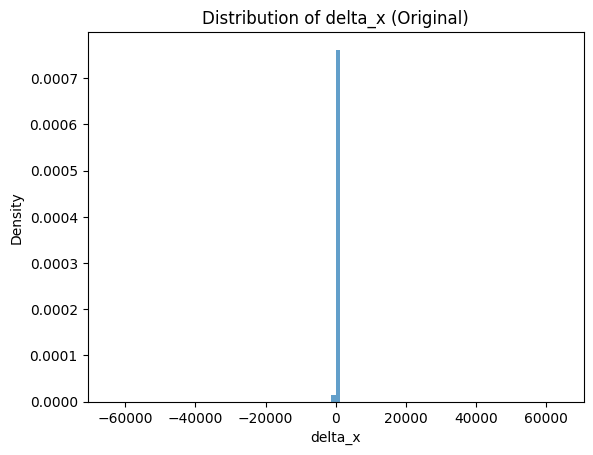

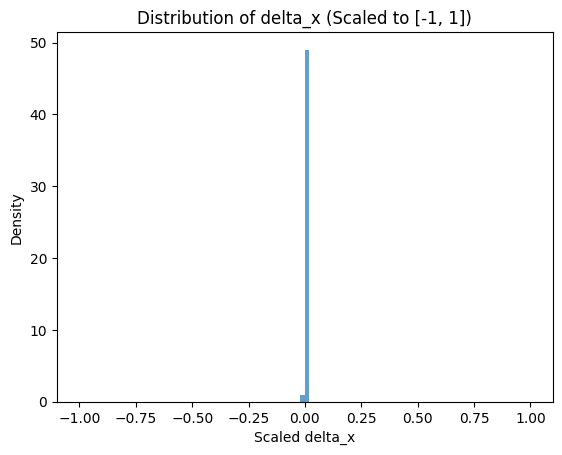

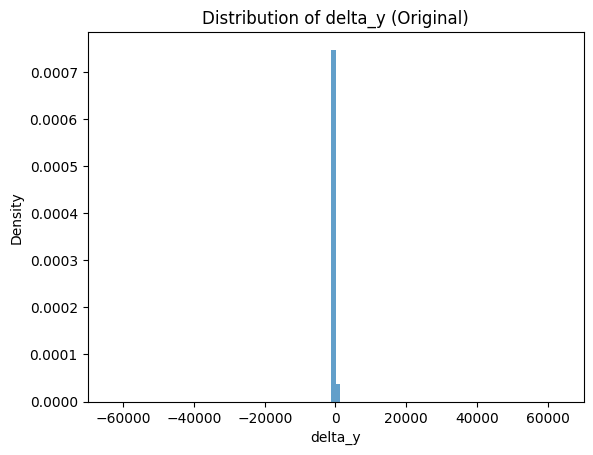

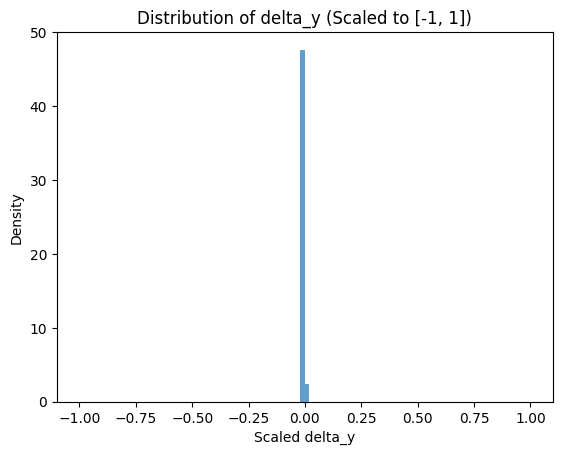

In [108]:
# Print separate statistics for delta_x and delta_y
print("\nOriginal Delta X statistics:")
print("Min:", delta_x.min(), "Max:", delta_x.max(), "Mean:", delta_x.mean(), "Std:", delta_x.std())
print("\nOriginal Delta Y statistics:")
print("Min:", delta_y.min(), "Max:", delta_y.max(), "Mean:", delta_y.mean(), "Std:", delta_y.std())

# 5. Normalize (scale) the delta values to a fixed range, e.g. [-1, 1].
def min_max_scale(arr, new_min=-1, new_max=1):
    arr_min = arr.min()
    arr_max = arr.max()
    # Scale arr to [0, 1]
    scaled = (arr - arr_min) / (arr_max - arr_min) if arr_max > arr_min else arr - arr_min
    # Then to [new_min, new_max]
    return scaled * (new_max - new_min) + new_min

scaled_delta_x = min_max_scale(delta_x, -1, 1)
scaled_delta_y = min_max_scale(delta_y, -1, 1)

print("\nScaled Delta X statistics:")
print("Min:", scaled_delta_x.min(), "Max:", scaled_delta_x.max(), "Mean:", scaled_delta_x.mean(), "Std:", scaled_delta_x.std())
print("\nScaled Delta Y statistics:")
print("Min:", scaled_delta_y.min(), "Max:", scaled_delta_y.max(), "Mean:", scaled_delta_y.mean(), "Std:", scaled_delta_y.std())

# 6. Visualize the distribution of the delta components.
# Plot histogram for delta_x
plt.figure()
plt.hist(delta_x, bins=100, density=True, alpha=0.7)
plt.title('Distribution of delta_x (Original)')
plt.xlabel('delta_x')
plt.ylabel('Density')
plt.show()

# Plot histogram for scaled delta_x
plt.figure()
plt.hist(scaled_delta_x, bins=100, density=True, alpha=0.7)
plt.title('Distribution of delta_x (Scaled to [-1, 1])')
plt.xlabel('Scaled delta_x')
plt.ylabel('Density')
plt.show()

# Plot histogram for delta_y
plt.figure()
plt.hist(delta_y, bins=100, density=True, alpha=0.7)
plt.title('Distribution of delta_y (Original)')
plt.xlabel('delta_y')
plt.ylabel('Density')
plt.show()

# Plot histogram for scaled delta_y
plt.figure()
plt.hist(scaled_delta_y, bins=100, density=True, alpha=0.7)
plt.title('Distribution of delta_y (Scaled to [-1, 1])')
plt.xlabel('Scaled delta_y')
plt.ylabel('Density')
plt.show()